<a href="https://colab.research.google.com/github/judebebo32/ML_CLG/blob/main/final_chl_mAN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn openpyxl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
import numpy as np


In [ ]:
file_path = "/content/synthetic_data.xlsx"
data = pd.read_excel(file_path, engine='openpyxl')


In [ ]:
# Assuming the first 8 columns are input variables and the last 3 columns are output variables
X = data.iloc[:, :8]
y = data.iloc[:, -3:]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
svr = SVR(kernel='linear')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
import numpy as np


In [ ]:
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
svr = MultiOutputRegressor(SVR(kernel='linear'))


In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    return r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test


In [ ]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}
for name, model in models.items():
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation:")
    print(f"R2 score (train): {r2_train:.3f}")
    print(f"R2 score (test): {r2_test:.3f}")
    print(f"RMSE (train): {rmse_train:.3f}")
    print(f"RMSE (test): {rmse_test:.3f}")
    print(f"MAE (train): {mae_train:.3f}")
    print(f"MAE (test): {mae_test:.3f}")
    print("\n")


GBR model evaluation:
R2 score (train): 0.975
R2 score (test): 0.837
RMSE (train): 1.519
RMSE (test): 3.673
MAE (train): 1.128
MAE (test): 2.615


RF model evaluation:
R2 score (train): 0.976
R2 score (test): 0.850
RMSE (train): 1.480
RMSE (test): 3.544
MAE (train): 1.042
MAE (test): 2.493


SVR model evaluation:
R2 score (train): 0.487
R2 score (test): 0.481
RMSE (train): 6.844
RMSE (test): 6.509
MAE (train): 4.952
MAE (test): 4.770




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
import numpy as np

file_path = "/content/synthetic_data.xlsx"
data = pd.read_excel(file_path, engine='openpyxl')
# Assuming the first 8 columns are input variables and the last 3 columns are output variables
X = data.iloc[:, :8]
y = data.iloc[:, -3:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(kernel='linear')
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = [], [], [], [], [], []
    
    for i in range(y_train.shape[1]):
        model.fit(X_train, y_train.iloc[:, i])
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        r2_train.append(r2_score(y_train.iloc[:, i], y_train_pred))
        r2_test.append(r2_score(y_test.iloc[:, i], y_test_pred))
        rmse_train.append(np.sqrt(mean_squared_error(y_train.iloc[:, i], y_train_pred)))
        rmse_test.append(np.sqrt(mean_squared_error(y_test.iloc[:, i], y_test_pred)))
        mae_train.append(mean_absolute_error(y_train.iloc[:, i], y_train_pred))
        mae_test.append(mean_absolute_error(y_test.iloc[:, i], y_test_pred))
    
    return r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test

for model_name, model in models.items():
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f'{model_name}:')
    print(f'  R2 Train: {r2_train}')
    print(f'  R2 Test: {r2_test}')
    print(f'  RMSE Train: {rmse_train}')
    print(f'  RMSE Test: {rmse_test}')
    print(f'  MAE Train: {mae_train}')
    print(f'  MAE Test: {mae_test}')
    print()


Gradient Boosting Regressor:
  R2 Train: [0.9747329042446505, 0.981551241882589, 0.9693145871586103]
  R2 Test: [0.8342119182397145, 0.8936074870736195, 0.783806272840907]
  RMSE Train: [1.4229248372100312, 1.306781706467758, 1.7867179997056264]
  RMSE Test: [3.45295421740099, 3.1674009601807533, 4.30426131103156]
  MAE Train: [1.0655052570990893, 0.9679404354599287, 1.3514865824393545]
  MAE Test: [2.5206051317017675, 2.062726539347849, 3.2623905649127196]

Random Forest Regressor:
  R2 Train: [0.9700971518594969, 0.9842557497127989, 0.9738782237036162]
  R2 Test: [0.8548002032630402, 0.8812873135653889, 0.8126736160394965]
  RMSE Train: [1.5479629957703835, 1.2072034567508607, 1.6485092190084631]
  RMSE Test: [3.2314479946611323, 3.3457699572789363, 4.006605288482582]
  MAE Train: [1.095150816104556, 0.8485525744873404, 1.181146815423197]
  MAE Test: [2.243480332946777, 2.162129571692149, 3.072927039021253]

Support Vector Regressor:
  R2 Train: [0.32655443467744727, 0.70551420603739

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    return best_model


In [ ]:
gbr_param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 4, 5]
}

rf_param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

svr_param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 1],
    'estimator__kernel': ['linear', 'poly', 'rbf']
}


In [ ]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}
param_grids = {'GBR': gbr_param_grid, 'RF': rf_param_grid, 'SVR': svr_param_grid}

for name, model in models.items():
    print(f"Tuning {name} hyperparameters...")
    tuned_model = tune_hyperparameters(model, param_grids[name], X_train, y_train)
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation (tuned):")
    print(f"R2 score (train): {r2_train:.3f}")
    print(f"R2 score (test): {r2_test:.3f}")
    print(f"RMSE (train): {rmse_train:.3f}")
    print(f"RMSE (test): {rmse_test:.3f}")
    print(f"MAE (train): {mae_train:.3f}")
    print(f"MAE (test): {mae_test:.3f}")
    print("\n")


Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


ValueError: ignored

In [ ]:
def evaluate_model_per_output(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred, multioutput='raw_values')
    r2_test = r2_score(y_test, y_test_pred, multioutput='raw_values')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred, multioutput='raw_values'))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred, multioutput='raw_values'))
    mae_train = mean_absolute_error(y_train, y_train_pred, multioutput='raw_values')
    mae_test = mean_absolute_error(y_test, y_test_pred, multioutput='raw_values')

    return r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test


In [ ]:
for name, model in models.items():
    print(f"Tuning {name} hyperparameters...")
    tuned_model = tune_hyperparameters(model, param_grids[name], X_train, y_train)
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model_per_output(tuned_model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation (tuned):")
    for i in range(3):
        print(f"Output {i + 1}:")
        print(f"R2 score (train): {r2_train[i]:.3f}")
        print(f"R2 score (test): {r2_test[i]:.3f}")
        print(f"RMSE (train): {rmse_train[i]:.3f}")
        print(f"RMSE (test): {rmse_test[i]:.3f}")
        print(f"MAE (train): {mae_train[i]:.3f}")
        print(f"MAE (test): {mae_test[i]:.3f}")
        print("\n")


Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned):
Output 1:
R2 score (train): 0.993
R2 score (test): 0.843
RMSE (train): 0.722
RMSE (test): 3.355
MAE (train): 0.543
MAE (test): 2.465


Output 2:
R2 score (train): 0.994
R2 score (test): 0.899
RMSE (train): 0.721
RMSE (test): 3.084
MAE (train): 0.535
MAE (test): 2.034


Output 3:
R2 score (train): 0.991
R2 score (test): 0.790
RMSE (train): 0.952
RMSE (test): 4.240
MAE (train): 0.739
MAE (test): 3.212


Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned):
Output 1:
R2 score (train): 0.973
R2 score (test): 0.853
RMSE (train): 1.473
RMSE (test): 3.255
MAE (train): 1.059
MAE (test): 2.258


Output 2:
R2 score (train): 0.985
R2 score (test): 0.883
RMSE (train): 1.183
RMSE (test): 3.325
MAE (train): 0.823
MAE (test): 2.155


Output 3:
R2 score (train): 0.975
R2 score (test): 0.810
RMSE (train): 1.622
RMSE 

In [ ]:
import time



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



In [ ]:
!pip install bayesian-optimization


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bayes_opt import BayesianOptimization



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization
import time

# Define the hyperparameter search space for RandomForestRegressor
param_space = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the search space for Bayesian optimization
bayes_space = {
    'n_estimators': (10, 200),
    'max_depth': (1, 50),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'bootstrap': (0, 1)
}


GRID SEARCH

In [ ]:
start_time = time.time()

grid_search = GridSearchCV(rf.estimator, param_grid=param_space, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_grid = grid_search.best_params_

elapsed_time = time.time() - start_time
print(f"Grid Search completed in {elapsed_time:.2f} seconds")
print(f"Best parameters: {best_params_grid}")


Grid Search completed in 283.16 seconds
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


randomized search

In [ ]:
start_time = time.time()

random_search = RandomizedSearchCV(rf.estimator, param_distributions=param_space, n_iter=50, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_

elapsed_time = time.time() - start_time
print(f"Randomized Search completed in {elapsed_time:.2f} seconds")
print(f"Best parameters: {best_params_random}")


Randomized Search completed in 50.62 seconds
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
bayesian_start = time.time()


In [ ]:
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap, X_train, y_train):
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        bootstrap=bool(bootstrap),
        random_state=42,
        n_jobs=-1
    )
    return np.mean(cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1))

def optimize_rf(X_train, y_train):
    def rf_crossval(n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap):
        return rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap, X_train, y_train)

    optimizer = BayesianOptimization(
        f=rf_crossval,
        pbounds=bayes_space,
        random_state=42,
    )
    optimizer.maximize(init_points=5, n_iter=25)
    return optimizer.max['params']

start_time = time.time()

best_params_bayesian = optimize_rf(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Bayesian Optimization completed in {time.time() - bayesian_start:.2f} seconds.")



|   iter    |  target   | bootstrap | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.7892    | 0.3745    | 47.59     | 3.196     | 6.789     | 39.64     |
| 2         | 0.6601    | 0.156     | 3.846     | 3.599     | 6.809     | 144.5     |
| 3         | 0.7911    | 0.02058   | 48.53     | 3.497     | 3.699     | 44.55     |
| 4         | 0.7978    | 0.1834    | 15.91     | 2.574     | 5.456     | 65.33     |
| 5         | 0.7968    | 0.6119    | 7.835     | 1.876     | 4.931     | 96.65     |
| 6         | 0.2814    | 0.0       | 1.0       | 1.0       | 2.0       | 10.0      |
| 7         | 0.7855    | 1.0       | 50.0      | 1.0       | 10.0      | 98.79     |
| 8         | 0.8126    | 1.0       | 50.0      | 1.0       | 2.0       | 200.0     |
| 9         | 0.2985    | 1.0       | 1.0       | 1.0       | 2.0       | 200.0     |
| 10        | 0.8127    | 1.0       | 50.0      | 1.0 

In [ ]:
def evaluate_best_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    return r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test

def print_results(name, model, X_train, y_train, X_test, y_test):
    print(f"{name} model evaluation:")
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_best_model(model, X_train, y_train, X_test, y_test)
    print(f"R2 score (train): {r2_train:.3f}")
    print(f"R2 score (test): {r2_test:.3f}")
    print(f"RMSE (train): {rmse_train:.3f}")
    print(f"RMSE (test): {rmse_test:.3f}")
    print(f"MAE (train): {mae_train:.3f}")
    print(f"MAE (test): {mae_test:.3f}")
    print("\n")

# Train and evaluate the models with the best hyperparameters
best_rf_grid = RandomForestRegressor(**best_params_grid, random_state=42)
best_rf_random = RandomForestRegressor(**best_params_random, random_state=42)
best_rf_bayesian = RandomForestRegressor(
    n_estimators=int(best_params_bayesian['n_estimators']),
    max_depth=int(best_params_bayesian['max_depth']),
    min_samples_split=int(best_params_bayesian['min_samples_split']),
    min_samples_leaf=int(best_params_bayesian['min_samples_leaf']),
    bootstrap=bool(best_params_bayesian['bootstrap']),
    random_state=42,
)

multi_best_rf_grid = MultiOutputRegressor(best_rf_grid)
multi_best_rf_random = MultiOutputRegressor(best_rf_random)
multi_best_rf_bayesian = MultiOutputRegressor(best_rf_bayesian)

multi_best_rf_grid.fit(X_train, y_train)
multi_best_rf_random.fit(X_train, y_train)
multi_best_rf_bayesian.fit(X_train, y_train)

print_results("Grid Search", multi_best_rf_grid, X_train, y_train, X_test, y_test)
print_results("Randomized Search", multi_best_rf_random, X_train, y_train, X_test, y_test)
print_results("Bayesian Optimization", multi_best_rf_bayesian, X_train, y_train, X_test, y_test)


Grid Search model evaluation:
R2 score (train): 0.977
R2 score (test): 0.849
RMSE (train): 1.453
RMSE (test): 3.554
MAE (train): 1.027
MAE (test): 2.501


Randomized Search model evaluation:
R2 score (train): 0.976
R2 score (test): 0.850
RMSE (train): 1.480
RMSE (test): 3.544
MAE (train): 1.042
MAE (test): 2.493


Bayesian Optimization model evaluation:
R2 score (train): 0.977
R2 score (test): 0.849
RMSE (train): 1.447
RMSE (test): 3.552
MAE (train): 1.024
MAE (test): 2.492




In [ ]:
def print_r2_scores(name, model, X_train, y_train, X_test, y_test):
    r2_train = r2_score(y_train, model.predict(X_train), multioutput='raw_values')
    r2_test = r2_score(y_test, model.predict(X_test), multioutput='raw_values')
    print(f"{name} model evaluation:")
    print("R2 score (train):", r2_train)
    print("R2 score (test):", r2_test)
    print("\n")

# Before optimization
models_before_optimization = {'GBR': gbr, 'RF': rf, 'SVR': svr}
for name, model in models_before_optimization.items():
    model.fit(X_train, y_train)
    print_r2_scores(name, model, X_train, y_train, X_test, y_test)

# After optimization
optimized_models = {
    'Grid Search': multi_best_rf_grid,
    'Randomized Search': multi_best_rf_random,
    'Bayesian Optimization': multi_best_rf_bayesian
}
for name, model in optimized_models.items():
    print_r2_scores(name, model, X_train, y_train, X_test, y_test)


GBR model evaluation:
R2 score (train): [0.9747329  0.98155124 0.96931459]
R2 score (test): [0.83421192 0.89360749 0.78380627]


RF model evaluation:
R2 score (train): [0.97009715 0.98425575 0.97387822]
R2 score (test): [0.8548002  0.88128731 0.81267362]


SVR model evaluation:
R2 score (train): [0.32655443 0.70551421 0.43005303]
R2 score (test): [0.33682345 0.66976162 0.43672182]


Grid Search model evaluation:
R2 score (train): [0.97195721 0.98462945 0.97440751]
R2 score (test): [0.85401797 0.88337934 0.80873   ]


Randomized Search model evaluation:
R2 score (train): [0.97009715 0.98425575 0.97387822]
R2 score (test): [0.8548002  0.88128731 0.81267362]


Bayesian Optimization model evaluation:
R2 score (train): [0.97168606 0.98481376 0.97494007]
R2 score (test): [0.85501731 0.88261374 0.80907615]




In [ ]:
# Create initial GBR, RF, and SVR models
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
svr = MultiOutputRegressor(SVR(kernel='linear'))

models = {'GBR': gbr, 'RF': rf, 'SVR': svr}

# Evaluate the initial models
for name, model in models.items():
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model_per_output(model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation:")
    for i in range(3):
        print(f"Output {i + 1}:")
        print(f"R2 score (train): {r2_train[i]:.3f}")
        print(f"R2 score (test): {r2_test[i]:.3f}")
        print(f"RMSE (train): {rmse_train[i]:.3f}")
        print(f"RMSE (test): {rmse_test[i]:.3f}")
        print(f"MAE (train): {mae_train[i]:.3f}")
        print(f"MAE (test): {mae_test[i]:.3f}")
        print("\n")


GBR model evaluation:
Output 1:
R2 score (train): 0.975
R2 score (test): 0.834
RMSE (train): 1.423
RMSE (test): 3.453
MAE (train): 1.066
MAE (test): 2.521


Output 2:
R2 score (train): 0.982
R2 score (test): 0.894
RMSE (train): 1.307
RMSE (test): 3.167
MAE (train): 0.968
MAE (test): 2.063


Output 3:
R2 score (train): 0.969
R2 score (test): 0.784
RMSE (train): 1.787
RMSE (test): 4.304
MAE (train): 1.351
MAE (test): 3.262


RF model evaluation:
Output 1:
R2 score (train): 0.970
R2 score (test): 0.855
RMSE (train): 1.548
RMSE (test): 3.231
MAE (train): 1.095
MAE (test): 2.243


Output 2:
R2 score (train): 0.984
R2 score (test): 0.881
RMSE (train): 1.207
RMSE (test): 3.346
MAE (train): 0.849
MAE (test): 2.162


Output 3:
R2 score (train): 0.974
R2 score (test): 0.813
RMSE (train): 1.649
RMSE (test): 4.007
MAE (train): 1.181
MAE (test): 3.073


SVR model evaluation:
Output 1:
R2 score (train): 0.327
R2 score (test): 0.337
RMSE (train): 7.346
RMSE (test): 6.906
MAE (train): 5.932
MAE (test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def plot_contour(model, param_grid, X_train, y_train, param1, param2, title):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)

    # Obtain results in a DataFrame
    results = pd.DataFrame(grid.cv_results_)
    
    # Extract values for the two selected parameters
    results[param1] = results['params'].apply(lambda x: x[param1])
    results[param2] = results['params'].apply(lambda x: x[param2])

    # Pivot the results DataFrame to create a matrix of mean_test_score
    scores_matrix = results.pivot_table(index=param1, columns=param2, values='mean_test_score')

    # Create a contour plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(-scores_matrix, annot=True, fmt='.4g', cmap='viridis', cbar_kws={'label': 'Mean Squared Error'})
    plt.title(f'{title} Hyperparameter Contour Plot')
    plt.xlabel(param2)
    plt.ylabel(param1)
    plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits


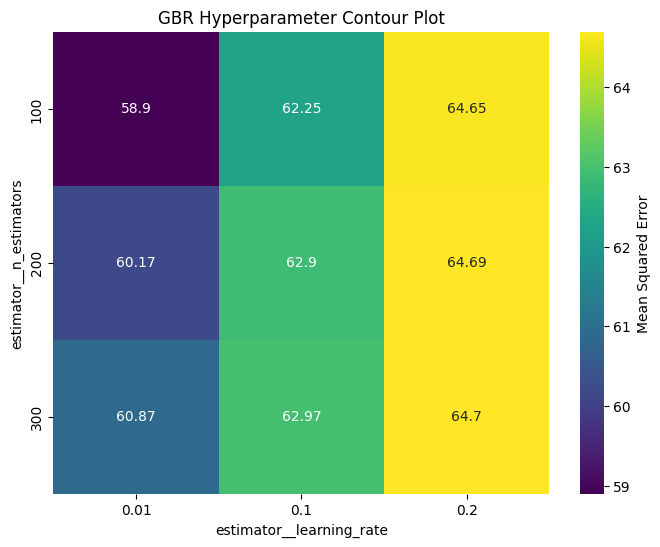

Fitting 5 folds for each of 108 candidates, totalling 540 fits


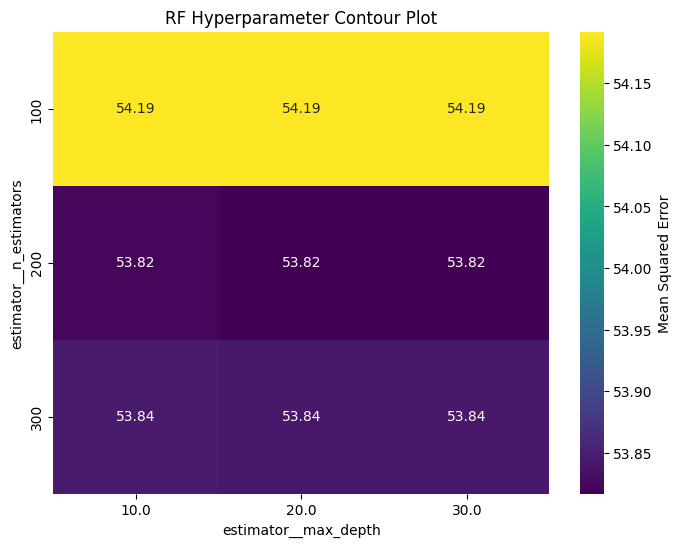

Fitting 5 folds for each of 27 candidates, totalling 135 fits


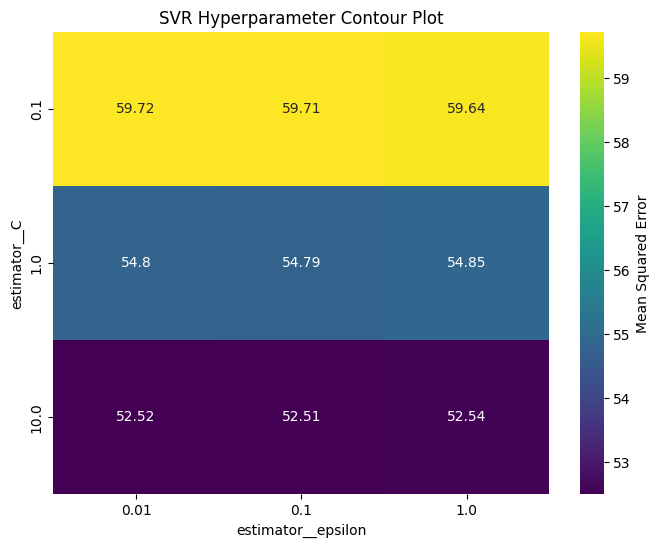

In [ ]:
plot_contour(gbr, gbr_param_grid, X_train, y_train, 'estimator__n_estimators', 'estimator__learning_rate', 'GBR')
plot_contour(rf, rf_param_grid, X_train, y_train, 'estimator__n_estimators', 'estimator__max_depth', 'RF')
plot_contour(svr, svr_param_grid, X_train, y_train, 'estimator__C', 'estimator__epsilon', 'SVR')


In [ ]:
from sklearn.feature_selection import RFECV


In [ ]:
def select_features(model, X_train, y_train):
    selector = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1)
    selector.fit(X_train, y_train)
    return selector


In [ ]:

def select_features(model, X_train, y_train, target_col):
    selector = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1)
    selector.fit(X_train, y_train[target_col])
    return selector


In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
svr = SVR()


In [ ]:

param_grids = {
    'GBR': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'RF': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVR': {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [1, 10, 100],
        'epsilon': [0.01, 0.1, 1]
    }
}


In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
svr = SVR()


In [ ]:
from sklearn.linear_model import LinearRegression

def select_features(model, X_train, y_train, target_col):
    if isinstance(model, SVR):
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        model = RFE (lr)
    else:
        model = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1)

    model.fit(X_train, y_train[target_col])
    return model




In [ ]:
from sklearn.feature_selection import RFE


In [ ]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}

for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])
        
        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        print("\n")



Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


IndexError: ignored

In [ ]:
def select_features(model, X_train, y_train, target_col):
    n_features_to_select = 4
    
    if isinstance(model, SVR):
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        model = RFE(lr, n_features_to_select=n_features_to_select)
    else:
        model = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1, min_features_to_select=n_features_to_select)

    model.fit(X_train, y_train[target_col])
    return model


In [ ]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}

for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])
        
        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        print("\n")


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.999
R2 score (test): 0.808
RMSE (train): 0.251
RMSE (test): 3.717
MAE (train): 0.196
MAE (test): 2.719


Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.971
R2 score (test): 0.849
RMSE (train): 1.512
RMSE (test): 3.297
MAE (train): 1.093
MAE (test): 2.297


Performing feature selection for SVR...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'VM (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 f

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_parity(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Line of best fit
    m, b = np.polyfit(y_true, y_pred, 1)
    plt.plot(y_true, m * y_true + b, color='red')

    # Diagonal line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')

    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.999
R2 score (test): 0.808
RMSE (train): 0.251
RMSE (test): 3.717
MAE (train): 0.196
MAE (test): 2.719


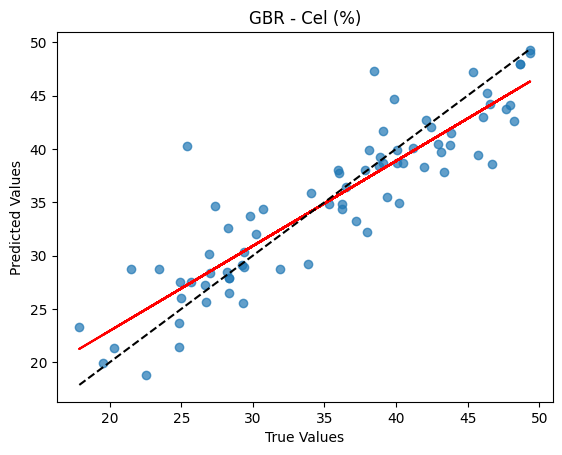



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.971
R2 score (test): 0.849
RMSE (train): 1.512
RMSE (test): 3.297
MAE (train): 1.093
MAE (test): 2.297


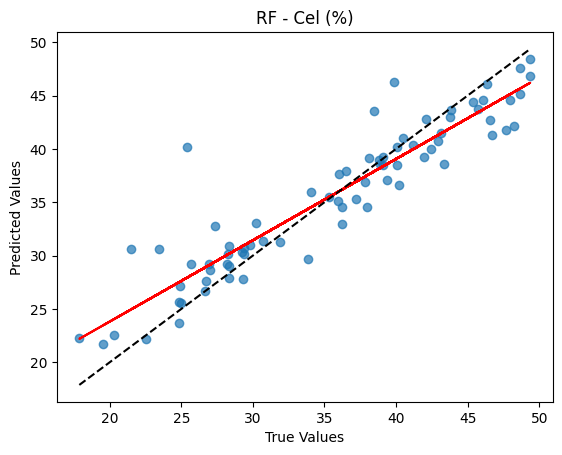



Performing feature selection for SVR...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'VM (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.340
R2 score (test): 0.330
RMSE (train): 7.270
RMSE (test): 6.943
MAE (train): 6.080
MAE (test): 5.691


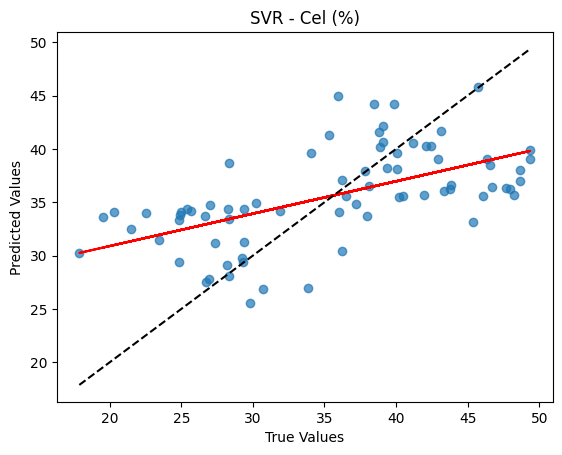



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.879
RMSE (train): 0.019
RMSE (test): 3.380
MAE (train): 0.014
MAE (test): 2.228


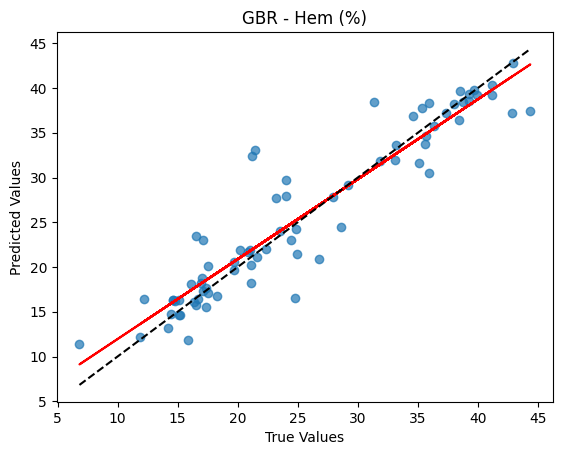



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'O (%)', 'S (%)', 'VM (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.984
R2 score (test): 0.896
RMSE (train): 1.209
RMSE (test): 3.134
MAE (train): 0.838
MAE (test): 2.088


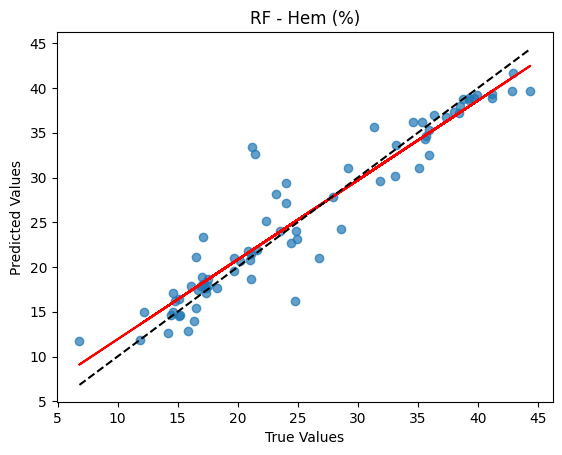



Performing feature selection for SVR...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.674
R2 score (test): 0.756
RMSE (train): 5.492
RMSE (test): 4.799
MAE (train): 4.158
MAE (test): 3.794


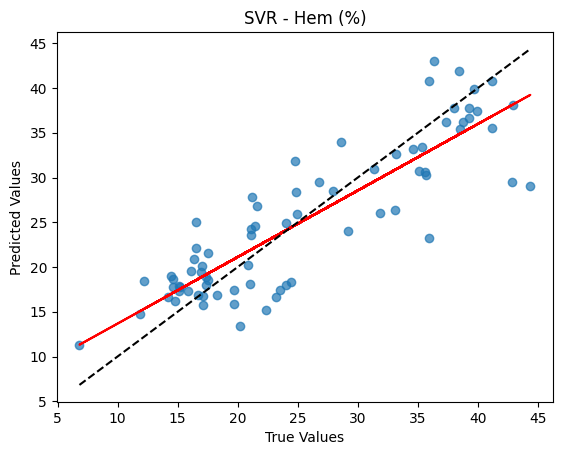



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.991
R2 score (test): 0.790
RMSE (train): 0.952
RMSE (test): 4.240
MAE (train): 0.739
MAE (test): 3.212


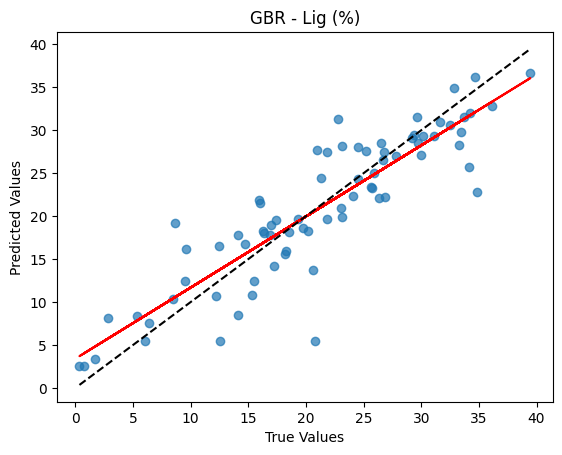



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.973
R2 score (test): 0.804
RMSE (train): 1.682
RMSE (test): 4.096
MAE (train): 1.241
MAE (test): 3.139


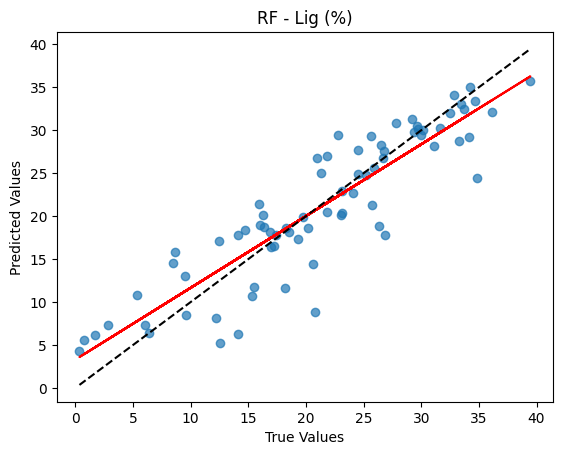



Performing feature selection for SVR...
Selected features: ['H (%)', 'O (%)', 'S (%)', 'VM (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.466
R2 score (test): 0.482
RMSE (train): 7.451
RMSE (test): 6.662
MAE (train): 5.610
MAE (test): 5.090


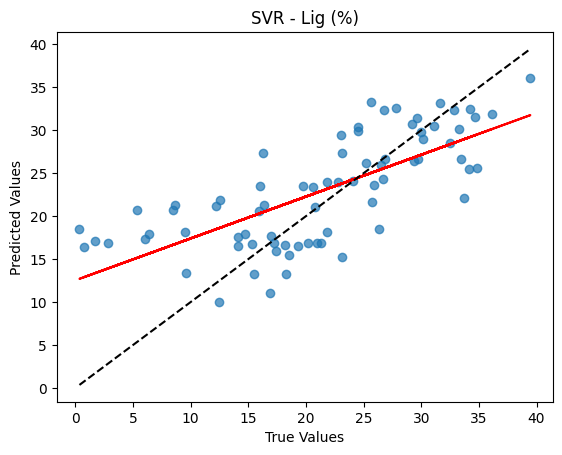

In [ ]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_test = tuned_model.predict(X_test_selected)
        plot_parity(y_test[output_col], y_pred_test, title=f"{name} - {output_col}")
        
        print("\n")


In [ ]:
def plot_parity(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Diagonal line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')

    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.999
R2 score (test): 0.808
RMSE (train): 0.251
RMSE (test): 3.717
MAE (train): 0.196
MAE (test): 2.719


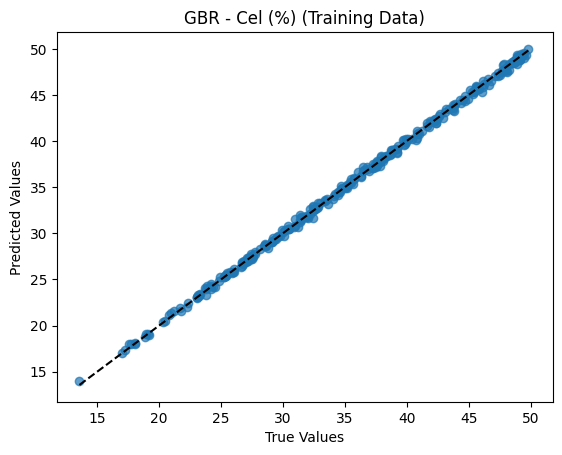



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.971
R2 score (test): 0.849
RMSE (train): 1.512
RMSE (test): 3.297
MAE (train): 1.093
MAE (test): 2.297


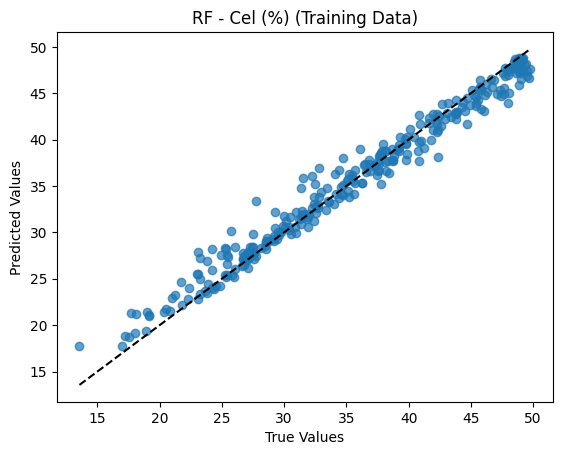



Performing feature selection for SVR...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'VM (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.340
R2 score (test): 0.330
RMSE (train): 7.270
RMSE (test): 6.943
MAE (train): 6.080
MAE (test): 5.691


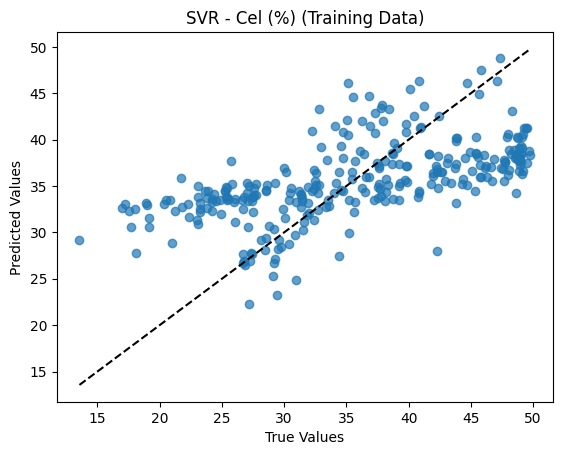



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.879
RMSE (train): 0.019
RMSE (test): 3.380
MAE (train): 0.014
MAE (test): 2.228


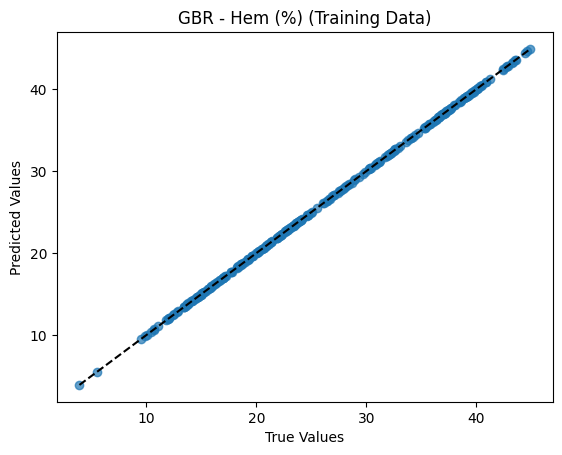



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'O (%)', 'S (%)', 'VM (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.984
R2 score (test): 0.896
RMSE (train): 1.209
RMSE (test): 3.134
MAE (train): 0.838
MAE (test): 2.088


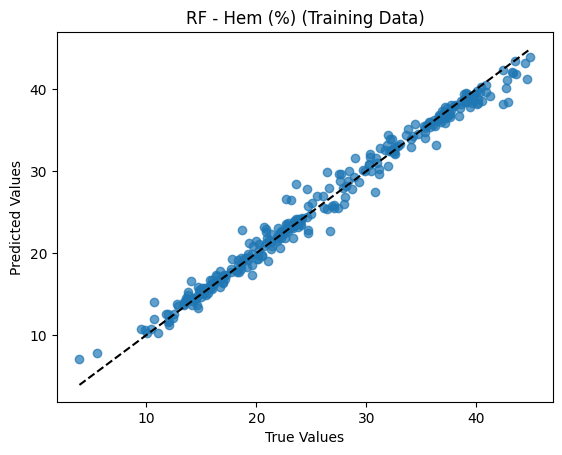



Performing feature selection for SVR...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.674
R2 score (test): 0.756
RMSE (train): 5.492
RMSE (test): 4.799
MAE (train): 4.158
MAE (test): 3.794


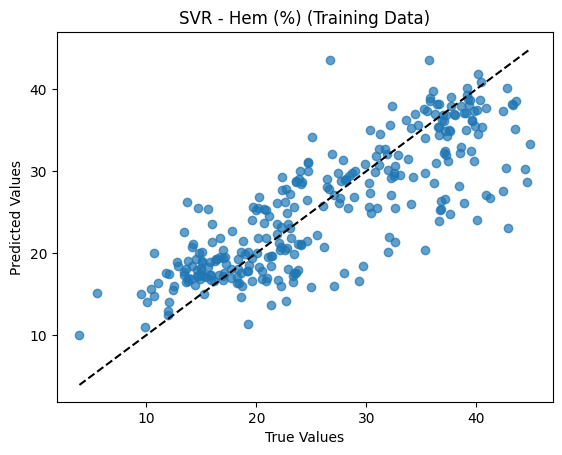



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.991
R2 score (test): 0.790
RMSE (train): 0.952
RMSE (test): 4.240
MAE (train): 0.739
MAE (test): 3.212


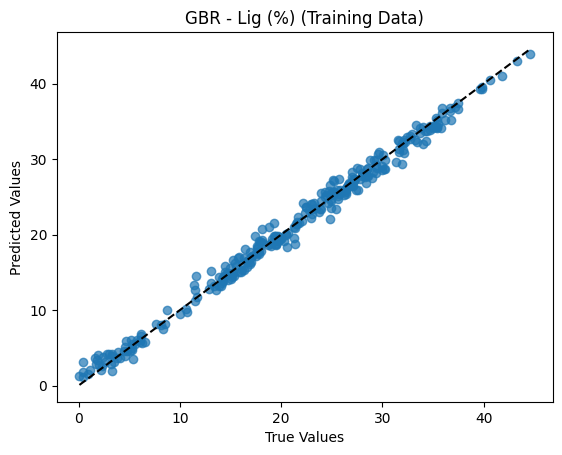



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.973
R2 score (test): 0.804
RMSE (train): 1.682
RMSE (test): 4.096
MAE (train): 1.241
MAE (test): 3.139


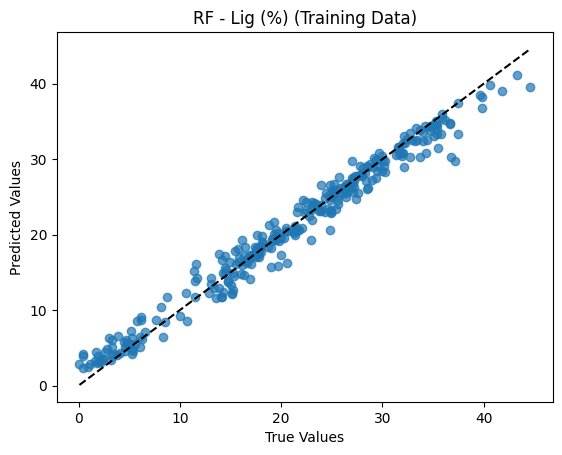



Performing feature selection for SVR...
Selected features: ['H (%)', 'O (%)', 'S (%)', 'VM (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.466
R2 score (test): 0.482
RMSE (train): 7.451
RMSE (test): 6.662
MAE (train): 5.610
MAE (test): 5.090


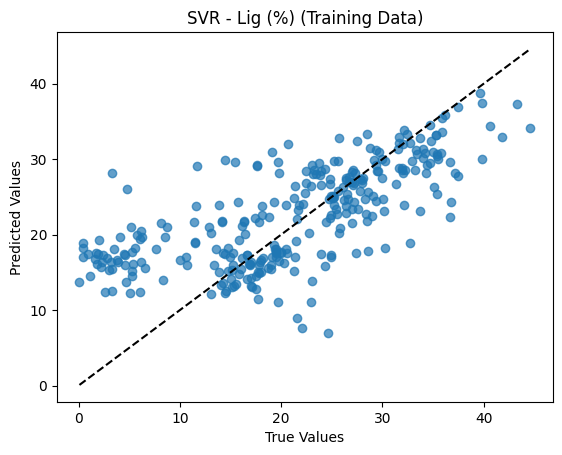

In [ ]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_train = tuned_model.predict(X_train_selected)
        plot_parity(y_train[output_col], y_pred_train, title=f"{name} - {output_col} (Training Data)")
        
        print("\n")


In [ ]:
import seaborn as sns


In [ ]:
def plot_parity(y_true, y_pred, title=''):
    sns.set(style='whitegrid', font_scale=1.2)

    # Scatter plot with a color map
    cmap = sns.cubehelix_palette(as_cmap=True)
    points = plt.scatter(y_true, y_pred, c=y_pred, cmap=cmap, alpha=0.7)
    plt.colorbar(points, label='Predicted Values')

    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Diagonal line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2)

    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.999
R2 score (test): 0.808
RMSE (train): 0.251
RMSE (test): 3.717
MAE (train): 0.196
MAE (test): 2.719


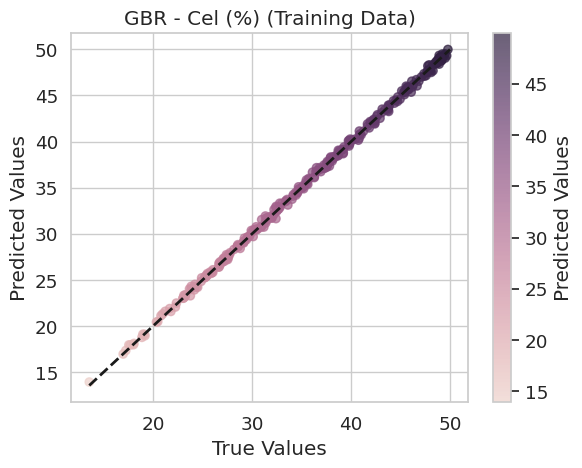



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.971
R2 score (test): 0.849
RMSE (train): 1.512
RMSE (test): 3.297
MAE (train): 1.093
MAE (test): 2.297


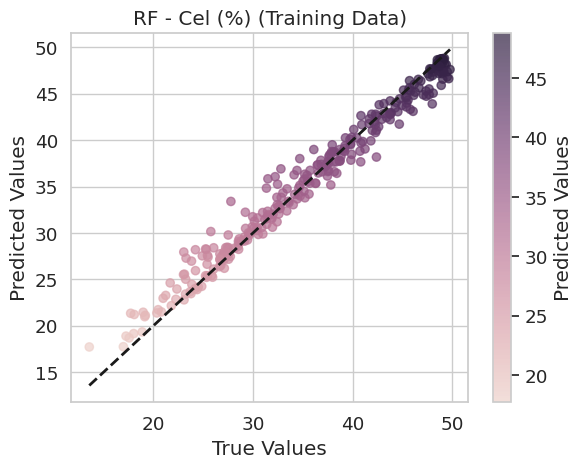



Performing feature selection for SVR...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'VM (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.340
R2 score (test): 0.330
RMSE (train): 7.270
RMSE (test): 6.943
MAE (train): 6.080
MAE (test): 5.691


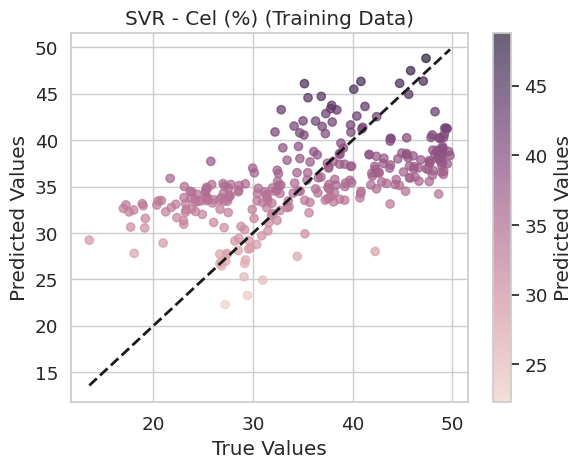



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.879
RMSE (train): 0.019
RMSE (test): 3.380
MAE (train): 0.014
MAE (test): 2.228


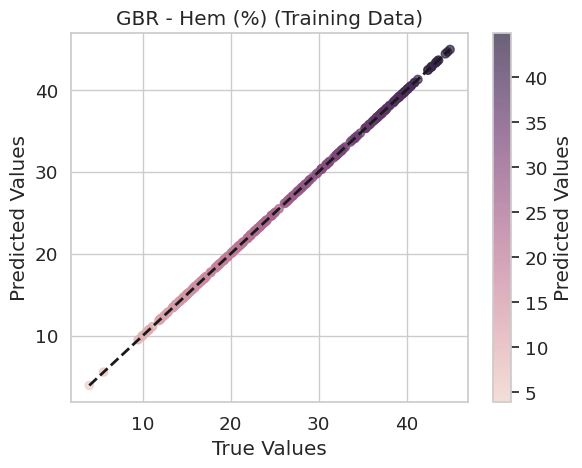



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'O (%)', 'S (%)', 'VM (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.984
R2 score (test): 0.896
RMSE (train): 1.209
RMSE (test): 3.134
MAE (train): 0.838
MAE (test): 2.088


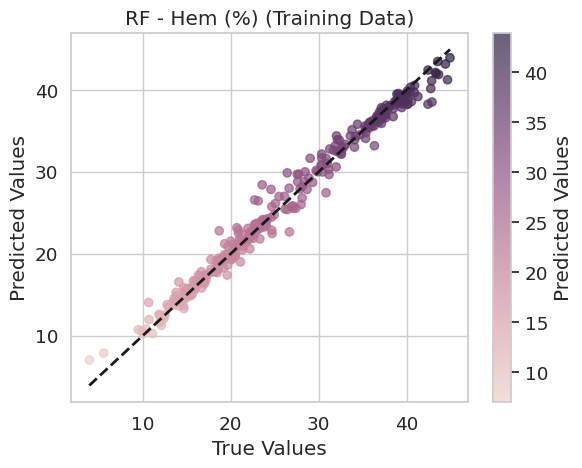



Performing feature selection for SVR...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.674
R2 score (test): 0.756
RMSE (train): 5.492
RMSE (test): 4.799
MAE (train): 4.158
MAE (test): 3.794


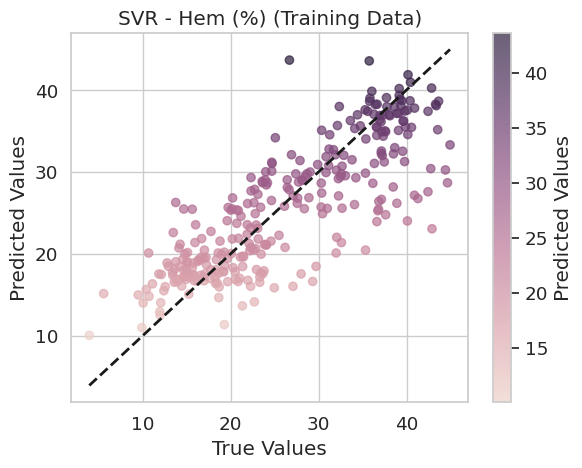



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.991
R2 score (test): 0.790
RMSE (train): 0.952
RMSE (test): 4.240
MAE (train): 0.739
MAE (test): 3.212


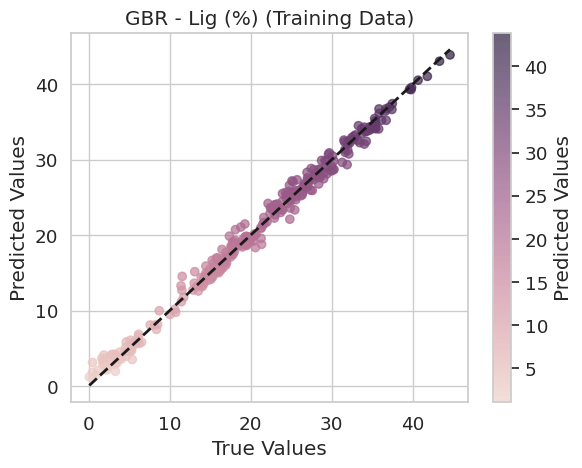



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.973
R2 score (test): 0.804
RMSE (train): 1.682
RMSE (test): 4.096
MAE (train): 1.241
MAE (test): 3.139


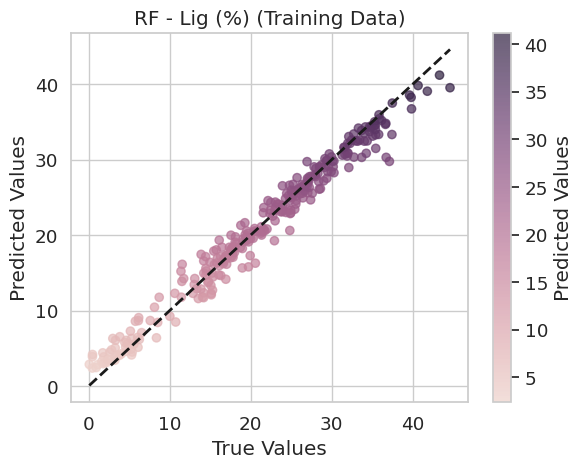



Performing feature selection for SVR...
Selected features: ['H (%)', 'O (%)', 'S (%)', 'VM (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.466
R2 score (test): 0.482
RMSE (train): 7.451
RMSE (test): 6.662
MAE (train): 5.610
MAE (test): 5.090


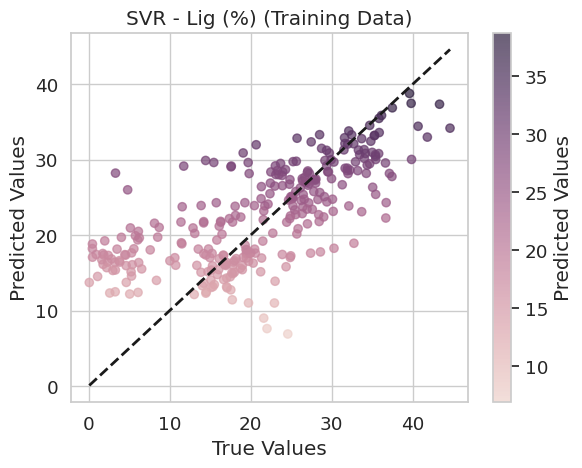

In [ ]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_train = tuned_model.predict(X_train_selected)
        plot_parity(y_train[output_col], y_pred_train, title=f"{name} - {output_col} (Training Data)")
        
        print("\n")


In [ ]:
def plot_parity(y_true_train, y_pred_train, y_true_test, y_pred_test, title=''):
    sns.set(style='whitegrid', font_scale=1.2)

    # Scatter plot with a color map for training data
    cmap_train = sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=True)
    points_train = plt.scatter(y_true_train, y_pred_train, c=y_pred_train, cmap=cmap_train, alpha=0.7, marker='o', label='Training Data')

    # Scatter plot with a color map for test data
    cmap_test = sns.cubehelix_palette(start=2.5, rot=-0.5, as_cmap=True)
    points_test = plt.scatter(y_true_test, y_pred_test, c=y_pred_test, cmap=cmap_test, alpha=0.7, marker='s', label='Test Data')

    plt.colorbar(points_train, label='Predicted Values')

    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Diagonal line
    min_val = min(min(y_true_train), min(y_true_test), min(y_pred_train), min(y_pred_test))
    max_val = max(max(y_true_train), max(y_true_test), max(y_pred_train), max(y_pred_test))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2)

    plt.legend()
    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.999
R2 score (test): 0.808
RMSE (train): 0.251
RMSE (test): 3.717
MAE (train): 0.196
MAE (test): 2.719


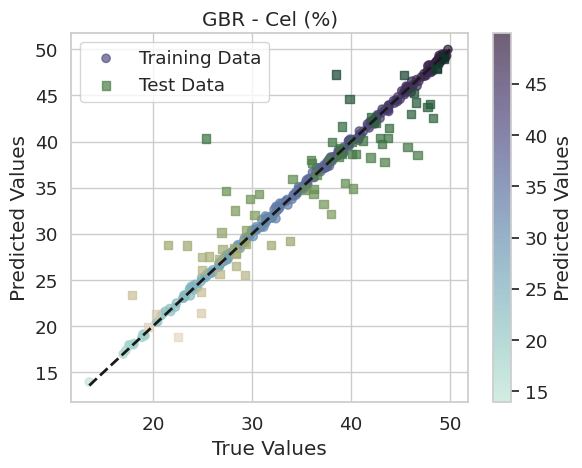



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.971
R2 score (test): 0.849
RMSE (train): 1.512
RMSE (test): 3.297
MAE (train): 1.093
MAE (test): 2.297


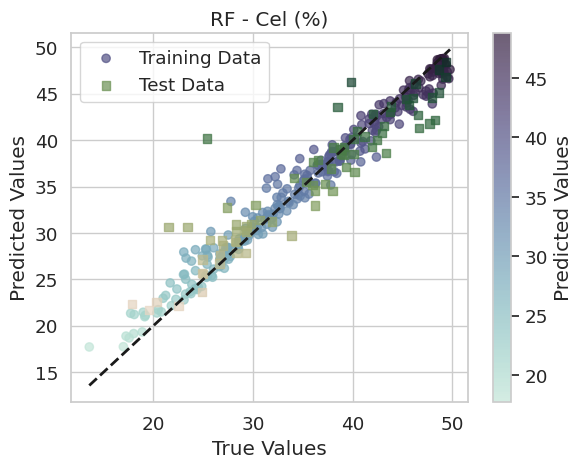



Performing feature selection for SVR...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'VM (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.340
R2 score (test): 0.330
RMSE (train): 7.270
RMSE (test): 6.943
MAE (train): 6.080
MAE (test): 5.691


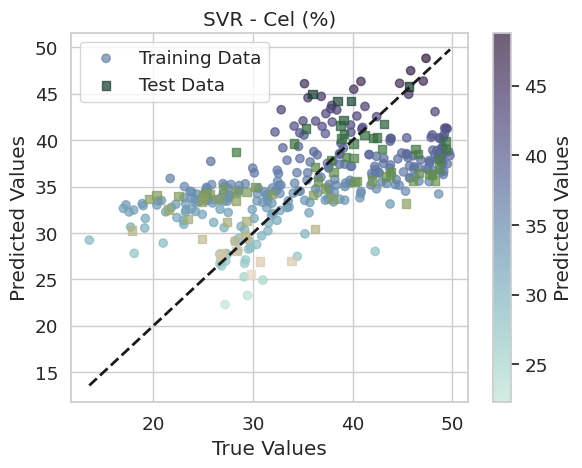



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.879
RMSE (train): 0.019
RMSE (test): 3.380
MAE (train): 0.014
MAE (test): 2.228


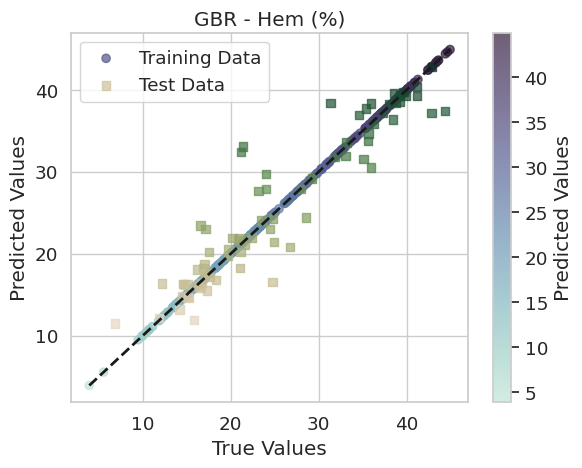



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'O (%)', 'S (%)', 'VM (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.984
R2 score (test): 0.896
RMSE (train): 1.209
RMSE (test): 3.134
MAE (train): 0.838
MAE (test): 2.088


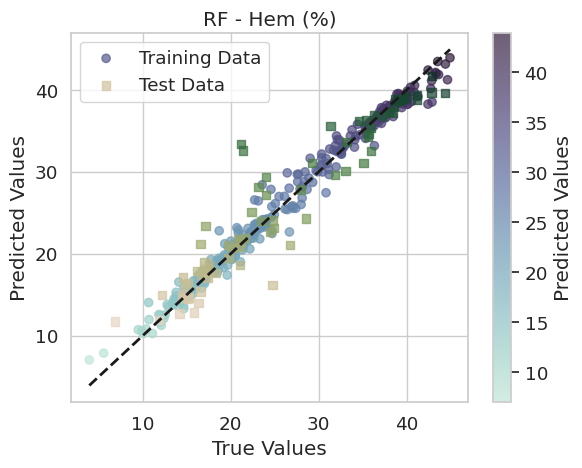



Performing feature selection for SVR...
Selected features: ['H (%)', 'N (%)', 'S (%)', 'FC (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.674
R2 score (test): 0.756
RMSE (train): 5.492
RMSE (test): 4.799
MAE (train): 4.158
MAE (test): 3.794


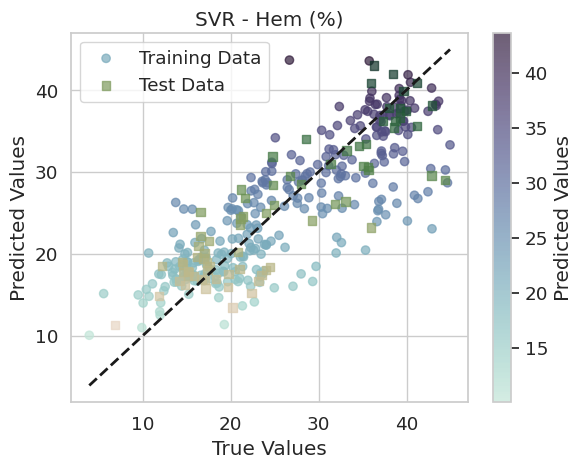



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 0.991
R2 score (test): 0.790
RMSE (train): 0.952
RMSE (test): 4.240
MAE (train): 0.739
MAE (test): 3.212


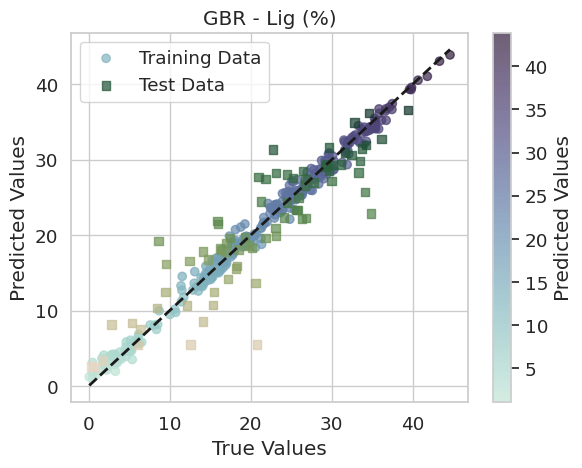



Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.973
R2 score (test): 0.804
RMSE (train): 1.682
RMSE (test): 4.096
MAE (train): 1.241
MAE (test): 3.139


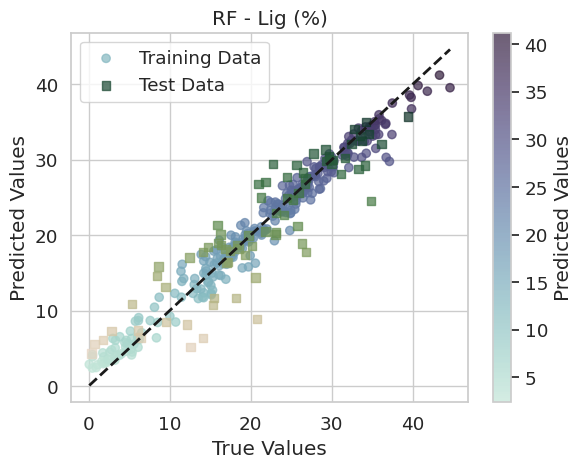



Performing feature selection for SVR...
Selected features: ['H (%)', 'O (%)', 'S (%)', 'VM (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.466
R2 score (test): 0.482
RMSE (train): 7.451
RMSE (test): 6.662
MAE (train): 5.610
MAE (test): 5.090


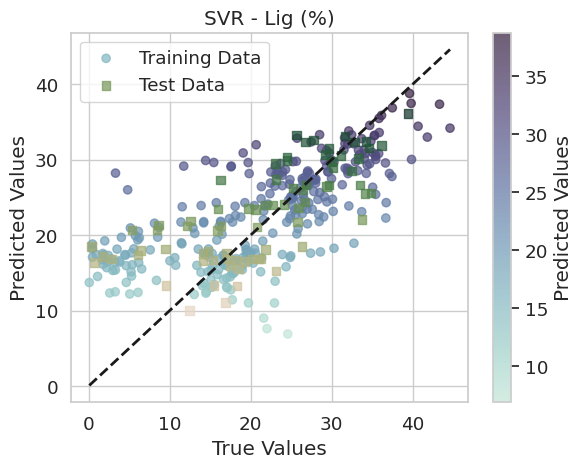

In [ ]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_train = tuned_model.predict(X_train_selected)
        y_pred_test = tuned_model.predict(X_test_selected)
        plot_parity(y_train[output_col], y_pred_train, y_test[output_col], y_pred_test, title=f"{name} - {output_col}")
        
        print("\n")


In [ ]:
!pip install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.2 MB/s eta 0:00:00


Output Cel (%):
Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


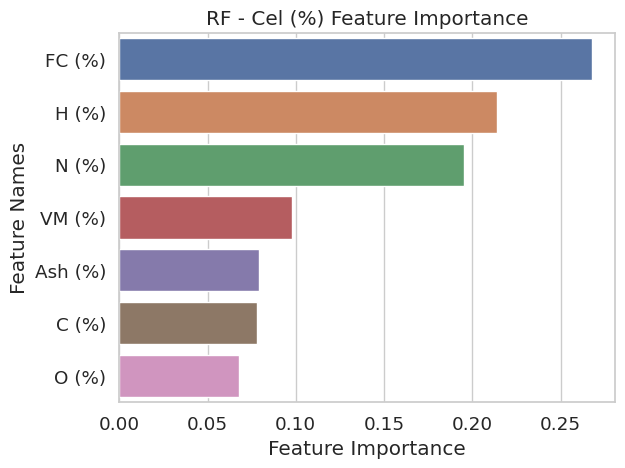

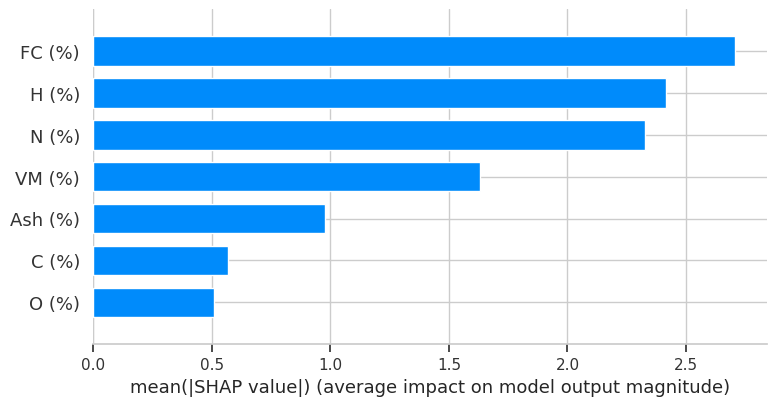



Output Hem (%):
Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'O (%)', 'S (%)', 'VM (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


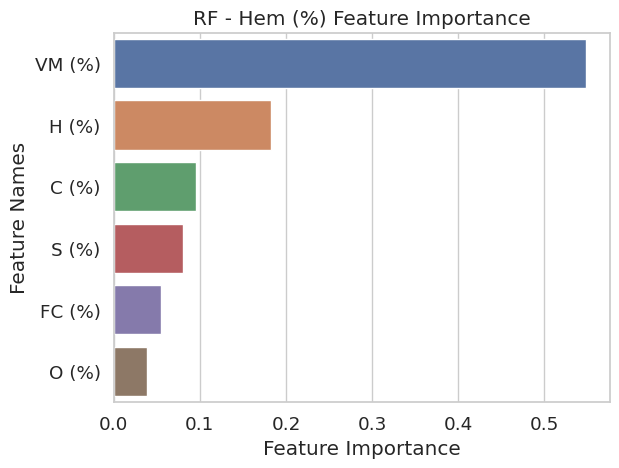

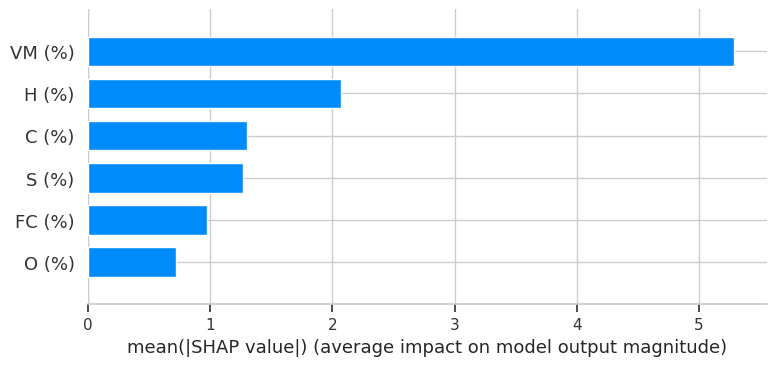



Output Lig (%):
Performing feature selection for RF...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


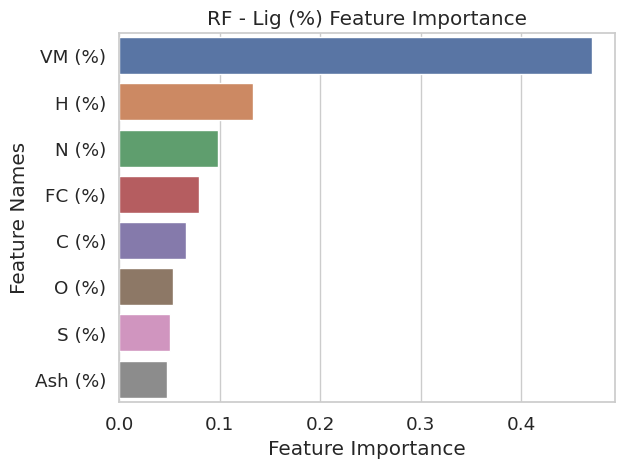

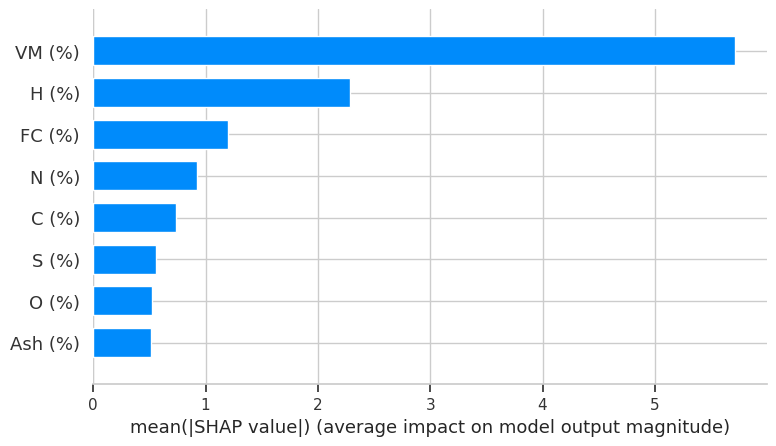

In [ ]:
def plot_feature_importance(importance, names, title):
    sns.set(style='whitegrid', font_scale=1.2)
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    plt.show()

selected_model_name = 'RF'
selected_model = models[selected_model_name]

for output_col in y_train.columns:
    print(f"Output {output_col}:")
    
    print(f"Performing feature selection for {selected_model_name}...")
    selector = select_features(selected_model, X_train, y_train, output_col)
    X_train_selected = X_train.iloc[:, selector.support_]
    X_test_selected = X_test.iloc[:, selector.support_]
    print(f"Selected features: {X_train_selected.columns.tolist()}")

    print(f"Tuning {selected_model_name} hyperparameters...")
    tuned_model = tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train[output_col])

    # Feature importance plot
    feature_importances = tuned_model.feature_importances_
    plot_feature_importance(feature_importances, X_train_selected.columns, title=f"{selected_model_name} - {output_col} Feature Importance")

    # SHAP analysis plot
    explainer = shap.TreeExplainer(tuned_model)
    shap_values = explainer.shap_values(X_train_selected)

    shap.summary_plot(shap_values, X_train_selected, plot_type='bar', title=f"{selected_model_name} - {output_col} SHAP Analysis")
    print("\n")


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


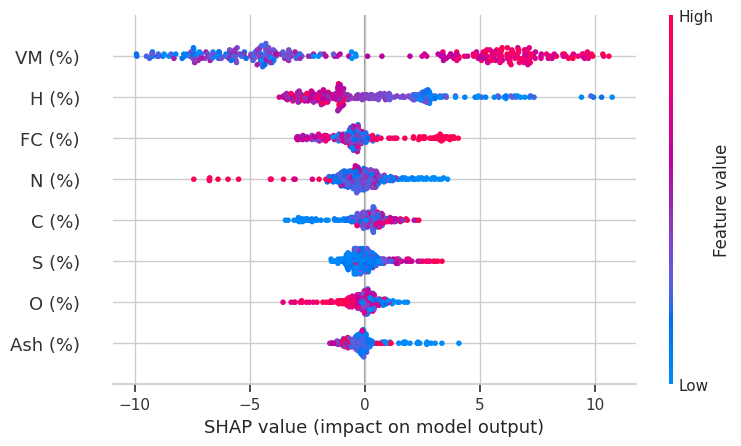

In [ ]:
# SHAP analysis plot
explainer = shap.TreeExplainer(tuned_model)
shap_values = explainer.shap_values(X_train_selected)

shap.summary_plot(shap_values, X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis")


In [ ]:
def select_features_multi_output(model, X, y, num_features=4):
    # Train an RFE model
    rfe = RFE(estimator=model, n_features_to_select=num_features)
    rfe = rfe.fit(X, y)
    
    return rfe




Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'VM (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


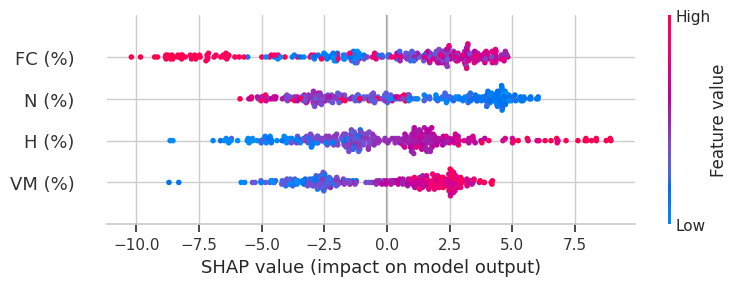

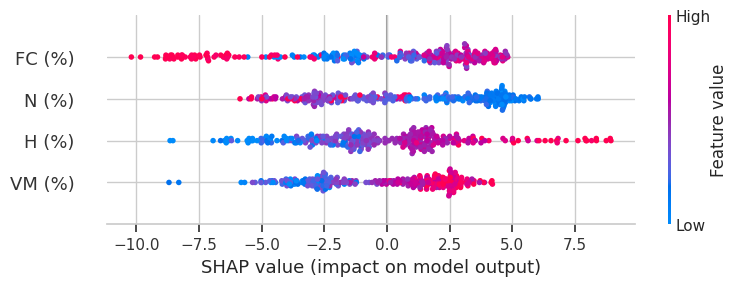

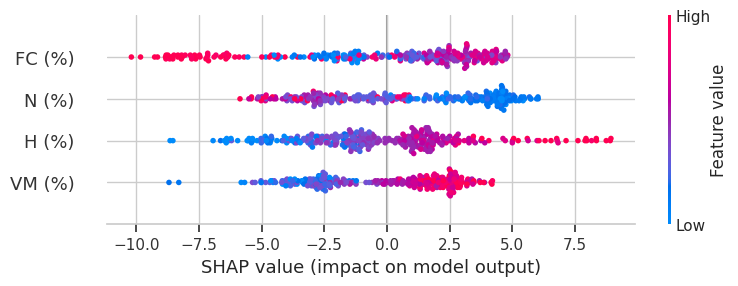

In [ ]:
selected_model_name = 'RF'
selected_model = models[selected_model_name]

# Perform feature selection for the selected model
print(f"Performing feature selection for {selected_model_name}...")
selector = select_features_multi_output(selected_model, X_train, y_train)
X_train_selected = X_train.iloc[:, selector.support_]
X_test_selected = X_test.iloc[:, selector.support_]
print(f"Selected features: {X_train_selected.columns.tolist()}")

# Tune hyperparameters for multi-output model
print(f"Tuning {selected_model_name} hyperparameters...")
multi_output_model = MultiOutputRegressor(tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train))

# Train the multi-output model
multi_output_model.fit(X_train_selected, y_train)

# Create SHAP tornado plots for each output variable
explainer = shap.TreeExplainer(multi_output_model.estimators_[0])
shap_values = [explainer.shap_values(X_train_selected) for _ in y_train.columns]

for idx, output_col in enumerate(y_train.columns):
    shap.summary_plot(shap_values[idx], X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis")


Using all features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


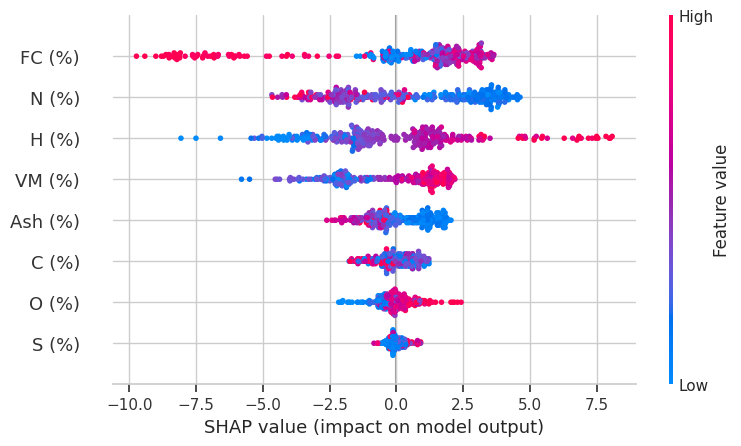

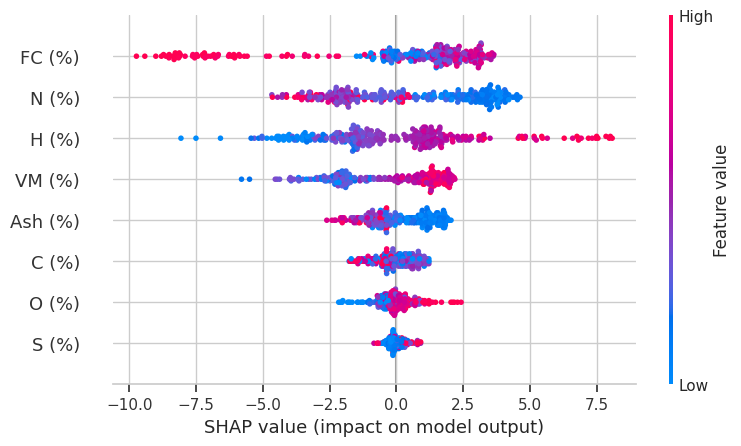

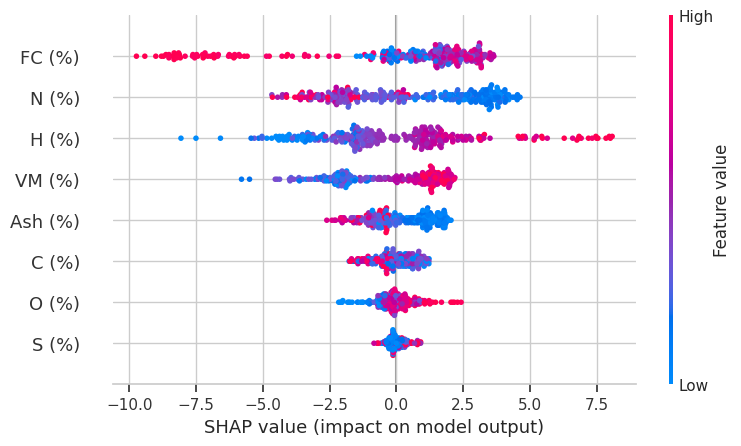

In [ ]:
selected_model_name = 'RF'
selected_model = models[selected_model_name]

# Use all features
X_train_selected = X_train
X_test_selected = X_test
print(f"Using all features: {X_train_selected.columns.tolist()}")

# Tune hyperparameters for multi-output model
print(f"Tuning {selected_model_name} hyperparameters...")
multi_output_model = MultiOutputRegressor(tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train))

# Train the multi-output model
multi_output_model.fit(X_train_selected, y_train)

# Create SHAP tornado plots for each output variable
explainer = shap.TreeExplainer(multi_output_model.estimators_[0])
shap_values = [explainer.shap_values(X_train_selected) for _ in y_train.columns]

for idx, output_col in enumerate(y_train.columns):
    shap.summary_plot(shap_values[idx], X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis")


Using all features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


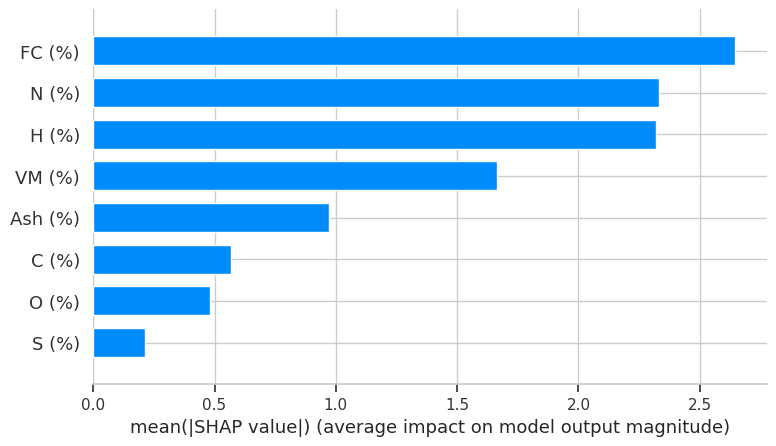

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


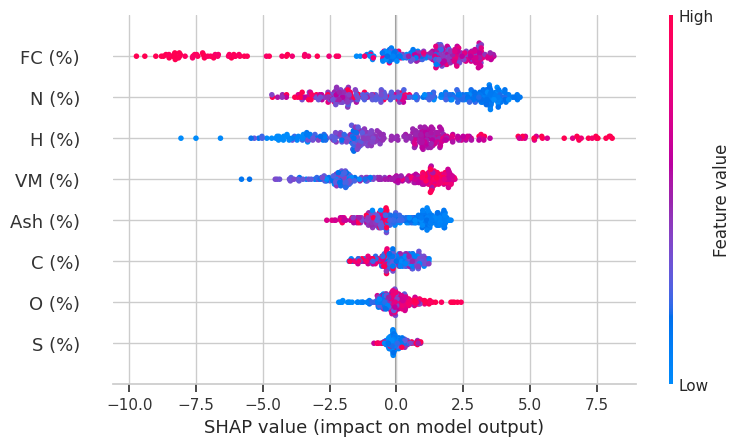

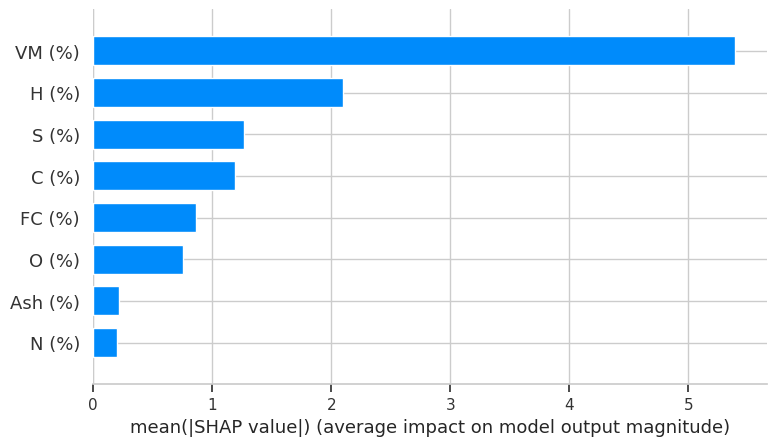

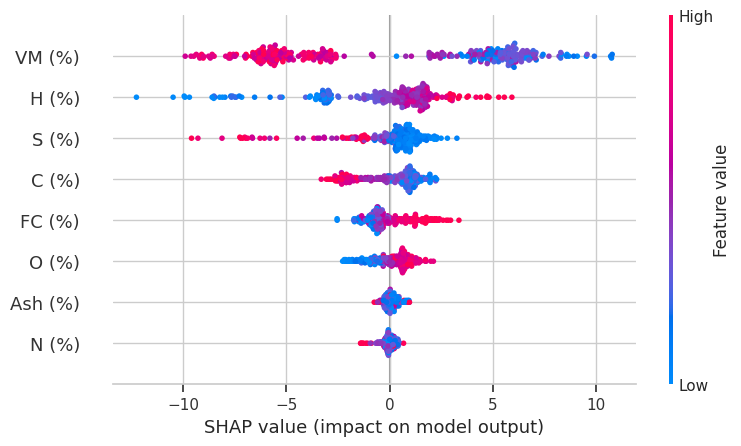

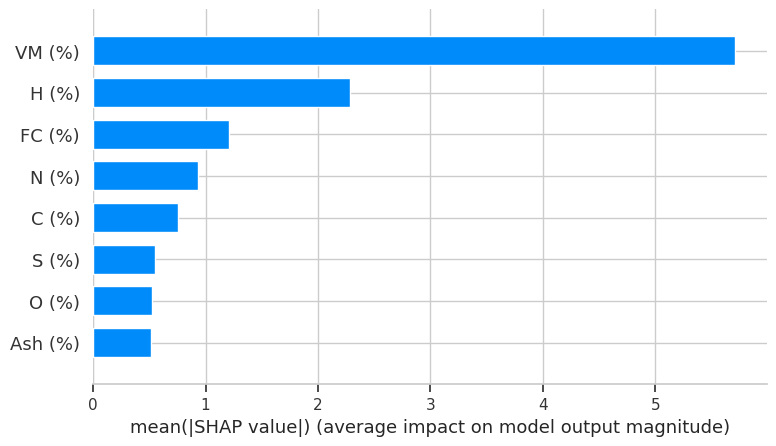

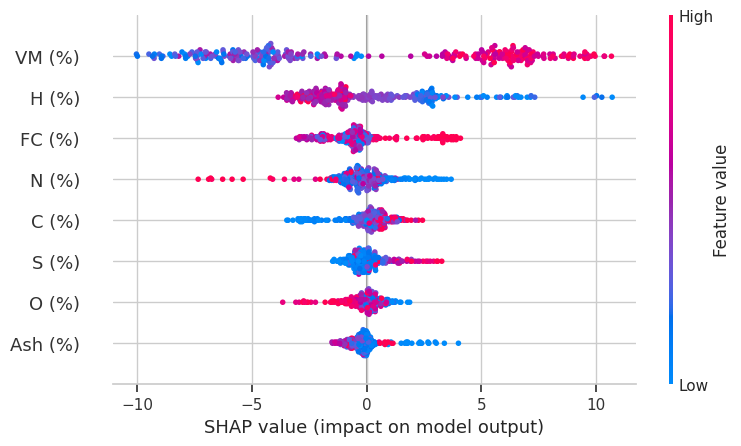

In [ ]:
selected_model_name = 'RF'
selected_model = models[selected_model_name]

# Use all features
X_train_selected = X_train
X_test_selected = X_test
print(f"Using all features: {X_train_selected.columns.tolist()}")

# Tune hyperparameters for multi-output model
print(f"Tuning {selected_model_name} hyperparameters...")
multi_output_model = MultiOutputRegressor(tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train))

# Train the multi-output model
multi_output_model.fit(X_train_selected, y_train)

# Create SHAP bar and tornado plots for each output variable
for idx, output_col in enumerate(y_train.columns):
    explainer = shap.TreeExplainer(multi_output_model.estimators_[idx])
    shap_values = explainer.shap_values(X_train_selected)
    
    # SHAP bar plot
    shap.summary_plot(shap_values, X_train_selected, plot_type='bar', title=f"{selected_model_name} - {output_col} SHAP Analysis (Bar)")
    
    # SHAP tornado plot
    shap.summary_plot(shap_values, X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis (Tornado)")


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Function to predict using the multi_output_model and display the results
def predict(inputs):
    input_data = pd.DataFrame([inputs], columns=X_train.columns)
    predictions = multi_output_model.predict(input_data)
    for i, output_col in enumerate(y_train.columns):
        print(f"{output_col}: {predictions[0][i]:.2f}")

# Create input widgets for each feature
input_widgets = {}
for col in X_train.columns:
    input_widgets[col] = widgets.FloatText(value=0, description=col)

# Create a button for prediction
predict_button = widgets.Button(description="Predict")

# Function to handle button click
def on_button_click(b):
    inputs = {key: widget.value for key, widget in input_widgets.items()}
    predict(inputs)

predict_button.on_click(on_button_click)

# Display the widgets
for widget in input_widgets.values():
    display(widget)
display(predict_button)


FloatText(value=0.0, description='C (%)')

FloatText(value=0.0, description='H (%)')

FloatText(value=0.0, description='N (%)')

FloatText(value=0.0, description='O (%)')

FloatText(value=0.0, description='S (%)')

FloatText(value=0.0, description='VM (%)')

FloatText(value=0.0, description='Ash (%)')

FloatText(value=0.0, description='FC (%)')

Button(description='Predict', style=ButtonStyle())

NameError: ignored

In [ ]:
import sklearn
print("scikit-learn version:", sklearn.__version__)



scikit-learn version: 1.2.2
